<a href="https://colab.research.google.com/github/Anderson-error/PPADB-Car-Accident-Dataset/blob/main/Car_Accident_Dataset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS TINGKAT KECELAKAAN PADA TAHUN 2021 DI DAERAH PERKOTAAN**

#**IMPORT LIBRARY**

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from google.colab import drive

# **BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk secara menyeluruh menggali dan memahami faktor-faktor yang berperan dalam terjadinya kecelakaan jalan di daerah perkotaan selama tahun tersebut. Melalui analisis yang mendalam terhadap data kecelakaan yang terinci, dengan tujuan untuk menyediakan wawasan yang komprehensif kepada pemangku kepentingan terkait tentang faktor-faktor seperti tanggal kejadian, hari dalam seminggu, kendali persimpangan, tingkat keparahan kecelakaan, kondisi geografis, kondisi pencahayaan dan cuaca, serta detail kendaraan yang terlibat. Dengan pemahaman yang lebih baik tentang dinamika kecelakaan jalan yang terjadi selama tahun 2021, kami bertujuan untuk mendukung pengembangan strategi keselamatan jalan yang lebih efektif. Langkah-langkah yang diambil dari analisis ini diharapkan dapat mengarah pada inisiatif pencegahan yang lebih efisien dan program keselamatan jalan yang lebih cermat, dengan tujuan akhir mengurangi jumlah insiden kecelakaan di masa depan dan meningkatkan keselamatan bagi semua pengguna jalan.

##**Assess Situation**

Situasi bisnis yang mendasari dari analisis ini adalah Kurangnya Kepedulian Pengemudi akan Keselamatan Pengemudi di wilayah perkotaan menunjukkan tingkat kesadaran yang rendah akan pentingnya keselamatan di jalan raya, kemudian Kondisi Jalan yang Minim akan Pencahayaan. Beberapa ruas jalan di wilayah perkotaan memiliki pencahayaan yang minim terutama pada malam hari Kondisi ini dapat menciptakan lingkungan yang kurang aman bagi pengguna jalan dan meningkatkan risiko kecelakaan terutama dalam kondisi cuaca buruk atau visibilitas rendah dan Kondisi Cuaca yang Ekstrem di Wilayah perkotaan rentan terhadap kondisi cuaca ekstrem, seperti hujan deras, kabut tebal, atau salju. Kondisi cuaca yang buruk dapat menyebabkan jalan menjadi licin dan mempengaruhi visibilitas.

##**Data Mining Goals**

Tujuan utama dari data mining adalah untuk mengidentifikasi pola-pola yang tidak terlihat dan hubungan yang signifikan dalam dataset kecelakaan. Data mining bertujuan untuk menggali informasi yang dapat membantu dalam memahami akar penyebab dari kecelakaan tersebut. Ini mencakup pencarian pola-pola seperti korelasi antara kondisi cuaca tertentu dengan tingkat kecelakaan, pola perilaku pengemudi yang berkontribusi terhadap insiden, atau kecenderungan tertentu dalam lokasi atau waktu kejadian kecelakaan.

##**Project Plan**

Proyek ini akan dimulai dengan pengumpulan dan pembersihan data kecelakaan jalan tahun 2021 di wilayah perkotaan. Selanjutnya, akan dilakukan analisis data mining untuk mengidentifikasi pola-pola dan hubungan-hubungan antara variabel-variabel dalam dataset. Hasil analisis akan disajikan dalam laporan yang berisi temuan-temuan utama dan rekomendasi untuk langkah-langkah perbaikan keselamatan jalan. Rekomendasi akan dievaluasi dan diimplementasikan oleh pihak berwenang, dengan pemantauan terhadap dampaknya terhadap tingkat kecelakaan secara keseluruhan.

# **DATA UNDERSTANDING**

##**Collect Initial Data**

Jadi dataset ini didapatkan di website kaggle. Dataset ini memberikan catatan rinci tentang kecelakaan di jalan raya yang terjadi pada tahun 2021 di daerah perkotaan. Dataset ini juga berguna untuk menganalisis dan memahami faktor-faktor yang berkontribusi terhadap kecelakaan lalu lintas di wilayah perkotaan, sehingga membantu pengembangan strategi untuk meningkatkan keselamatan jalan raya. https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset

In [79]:
drive.mount('/content/drive')

df=pd.read_csv("/content/drive/MyDrive/Road Accident Data.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


## **Describe Data**

###Informasi Dasar

In [80]:
jumlah_baris,jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 307973
Jumlah Kolom: 21


Berdasarkan informasi diatas dataset ini memiliki jumlah baris sebanyak 65058 baris dan memiliki jumlah kolom sebanyak 21 kolom

###Informasi Lanjutan

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

berikut penjelasan berdasarkan informasi yang diberikan diatas:

1. Accident_Index: Merupakan indeks unik untuk setiap kecelakaan **dengan tipe data object**.

2. Accident Date: Menunjukkan tanggal kecelakaan **dengan tipe data object**.

3. Day_of_Week: Menunjukkan hari dalam seminggu saat kecelakaan terjadi **dengan tipe data object**.

4. Junction_Control: Menunjukkan kontrol persimpangan (misalnya, traffic signal, roundabout, atau tidak ada kontrol) **dengan tipe data object**.

5. Junction_Detail: Detail tentang persimpangan (misalnya, apakah berupa roundabout atau bukan) **dengan tipe data object**.

6. Accident_Severity: Tingkat keparahan kecelakaan (Serious, Slight, atau Fatal) **dengan tipe data object**.

7. Latitude dan Longitude: Koordinat lokasi kecelakaan **dengan tipe data float64**.

8. Light_Conditions: Kondisi pencahayaan saat kecelakaan terjadi **dengan tipe data object**.

9. Local_Authority_(District): Otoritas lokal yang bertanggung jawab atas wilayah tersebut **dengan tipe data object**.

10. Carriageway_Hazards: Bahaya di jalur perjalanan (misalnya, hewan liar atau bahan berbahaya) **dengan tipe data object**.

11. Number_of_Casualties: Jumlah total korban dalam kecelakaan **dengan tipe data int64**.

12. Number_of_Vehicles: Jumlah total kendaraan yang terlibat dalam kecelakaan **dengan tipe data int64**.

13. Police_Force: Kekuatan polisi yang menangani kecelakaan **dengan tipe data object**.

14. Road_Surface_Conditions: Kondisi permukaan jalan saat kecelakaan terjadi **dengan tipe data object**.

15. Road_Type: Jenis jalan (misalnya, jalan raya, jalan lokal, atau jalan pedesaan) **dengan tipe data object**.

16. Speed_limit: Batas kecepatan di lokasi kecelakaan **dengan tipe data float64**.

17. Time: Waktu kecelakaan terjadi **dengan tipe data object**.

18. Urban_or_Rural_Area: Menunjukkan apakah lokasi kecelakaan berada di daerah perkotaan atau pedesaan **dengan tipe data object**.

19. Weather_Conditions: Kondisi cuaca saat kecelakaan terjadi **dengan tipe data object**.

20. Vehicle_Type: Jenis kendaraan yang terlibat dalam kecelakaan **dengan tipe data object**.

- float64(3): Menunjukkan bahwa ada 3 kolom dengan tipe data float64, yaitu tipe data bilangan real dengan presisi floating-point.

- int64(2): Menunjukkan bahwa ada 2 kolom dengan tipe data int64, yaitu tipe data bilangan bulat.

- object(16): Menunjukkan bahwa ada 16 kolom dengan tipe data object, yang dalam konteks ini mungkin merujuk pada string atau tipe data campuran lainnya.

###Informasi Statistik Deskriptif

In [82]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


Berikut adalah data statistik deskriptif untuk setiap kolom pada Car Accident dataset diatas :

- **Latitude**
1. Jumlah : 307973.000000
2. Rata-rata : 52.4870005
3. Standar deviasi : 1.339011
4. Minimum : 49.914488
5. 25% : 551.485248
6. 50% : 52.225943
7. 75% : 53.415517
8. Maksimum : 60.598055

- **Longitude**
1. Jumlah : 307973.000000
2. Rata-rata : -1.368884
3. Standar deviasi : 1.356092
4. Minimum : -7.516225
5. 25% : -2.247937
6. 50% : -1.349258
7. 75% : -0.206810
8. Maksimum : 1.759398

- **Number of Casualties**
1. Jumlah : 307973.000000
2. Rata-rata : 1.356882
3. Standar deviasi : 0.815857
4. Minimum : 1.000000
5. 25% : 1.000000
6. 50% : 1.000000
7. 75% : 1.000000
8. Maksimum : 48.000000

**Number of Vehicle**
1. Jumlah : 307973.000000
2. Rata-rata : 1.829063
3. Standar deviasi : 0.710477
4. Minimum : 1.000000
5. 25% : 1.000000
6. 50% : 2.000000
7. 75% : 2.000000
8. Maksimum : 32.000000

**Speed Limit**
1. Jumlah : 307973.000000
2. Rata-rata : 38.866037
3. Standar deviasi : 14.032933
4. Minimum : 10.000000
5. 25% : 30.000000
6. 50% : 30.000000
7. 75% : 50.000000
8. Maksimum : 70.000000

##**Exploratory Data Analysis**

In [83]:
df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

<ipython-input-84-1ba04b9bbf10>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




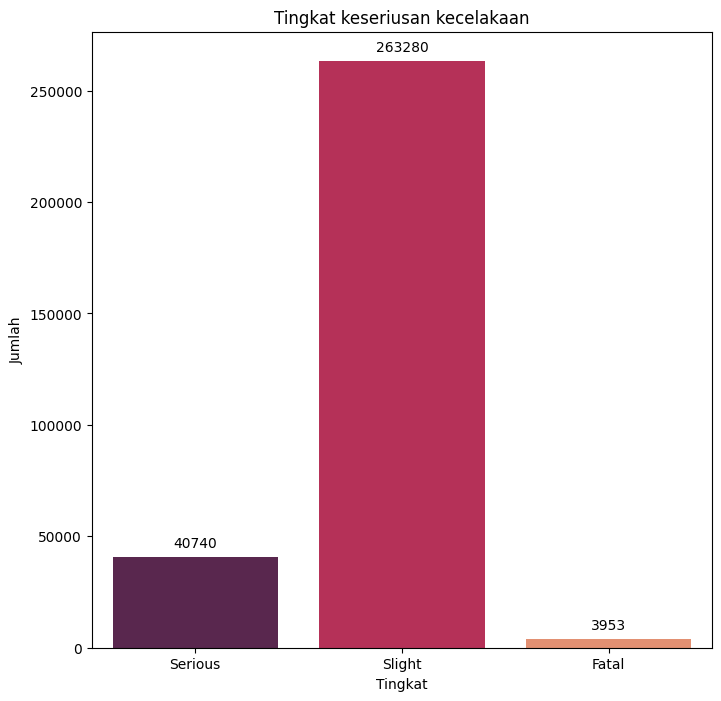

In [84]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Accident_Severity', data=df  , palette='rocket')
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Tingkat keseriusan kecelakaan')
plt.xlabel('Tingkat')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan visualisasi diatas menunjukkan bahwa tingkat keseriusan yang paling tinggi adalah Slight(sedikit) yaitu sebanyak 55627 kasus kemudian dilanjut oleh Serious(serius) sebanyak 8443 kasus dan yang terakhir Fatal(fatal) sebanyak 988 kasus.

##**Verify Data Quality**

###Missing Values

In [85]:
missing_values = df.isnull().sum()

print(missing_values)

Accident_Index                   0
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              3
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
Vehicle_Type                     0
dtype: int64


Berdasarkan hasil output, terdapat beberapa kolom yang memiliki missing values (nilai yang hilang). Berikut adalah mengenai missing values dalam data:

- Carriageway_Hazards: Terdapat 3 missing value.
- Road_Surface_Conditions: Terdapat 317 missing values.
- Road_Type: Terdapat 1534 missing values.
- Time: Terdapat 17 missing value.
- Weather_Conditions: Terdapat 6057 missing values.

###Outliers Values

In [86]:
def detect_outliers(column):
    # Cek apakah kolom memiliki tipe data numerik
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

        percentage_outliers = outliers.sum() / len(column) * 100

        return outliers, percentage_outliers
    else:
        return None, None

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    if outliers is not None and percentage_outliers is not None:
        print(f"Kolom '{column}':")
        print(f"  - Jumlah outliers: {outliers.sum()}")
        print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
        print()
    else:
        print(f"Kolom '{column}' tidak berisi data numerik.")

Kolom 'Accident_Index' tidak berisi data numerik.
Kolom 'Accident Date' tidak berisi data numerik.
Kolom 'Day_of_Week' tidak berisi data numerik.
Kolom 'Junction_Control' tidak berisi data numerik.
Kolom 'Junction_Detail' tidak berisi data numerik.
Kolom 'Accident_Severity' tidak berisi data numerik.
Kolom 'Latitude':
  - Jumlah outliers: 3335
  - Persentase kehadiran outliers: 1.08%

Kolom 'Light_Conditions' tidak berisi data numerik.
Kolom 'Local_Authority_(District)' tidak berisi data numerik.
Kolom 'Carriageway_Hazards' tidak berisi data numerik.
Kolom 'Longitude':
  - Jumlah outliers: 655
  - Persentase kehadiran outliers: 0.21%

Kolom 'Number_of_Casualties':
  - Jumlah outliers: 72880
  - Persentase kehadiran outliers: 23.66%

Kolom 'Number_of_Vehicles':
  - Jumlah outliers: 6803
  - Persentase kehadiran outliers: 2.21%

Kolom 'Police_Force' tidak berisi data numerik.
Kolom 'Road_Surface_Conditions' tidak berisi data numerik.
Kolom 'Road_Type' tidak berisi data numerik.
Kolom 'Sp

Berdasarkan hasil output, dapat disimpulkan sebagai berikut:

1. Latitude
- Terdapat 3355 outliers, atau sekitar 1.08% dari total data.

2. Longitude
-  Terdapat 655 outliers, atau sekitar 0.21% dari total data.

3. Number_of_Casualties
- Terdapat 72.880 outliers, atau sekitar 23.66% dari total data.

4. Number_of_Vehicles
- Terdapat 6.803 outliers, atau sekitar 2.21% dari total data.

5. Speed_limit
-  Tidak terdapat outliers pada kolom ini, yang berarti distribusi data untuk koordinat lintang dan bujur cenderung homogen.


###Duplicated Values

In [87]:
duplicate_values = df.duplicated()

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

Apakah Ada Nilai Duplikat pada Tiap Kolom:
0         False
1         False
2         False
3         False
4         False
          ...  
307968    False
307969    False
307970    False
307971    False
307972    False
Length: 307973, dtype: bool


Berdasarkan hasil output dari data duplicated values di atas adalah Tidak ada nilai yang sama atau duplikat pada setiap baris (indeks) dari DataFrame. Setiap baris memiliki nilai yang unik, yang menunjukkan bahwa tidak ada duplikat dalam DataFrame ini.






# **DATA CLEANING**

## **Penanganan Missing Values**

### pengecekan missing values

In [91]:
sorted_missing_percentages = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
print(sorted_missing_percentages)

Weather_Conditions            1.966731
Road_Type                     0.498096
Road_Surface_Conditions       0.102931
Time                          0.005520
Carriageway_Hazards           0.000974
Accident_Index                0.000000
Number_of_Casualties          0.000000
Urban_or_Rural_Area           0.000000
Speed_limit                   0.000000
Police_Force                  0.000000
Number_of_Vehicles            0.000000
Longitude                     0.000000
Accident Date                 0.000000
Local_Authority_(District)    0.000000
Light_Conditions              0.000000
Latitude                      0.000000
Accident_Severity             0.000000
Junction_Detail               0.000000
Junction_Control              0.000000
Day_of_Week                   0.000000
Vehicle_Type                  0.000000
dtype: float64


Nilai kosong paling banyak terdapat pada kolom Weather_Conditions

Nilai kosong pada Weather Conditions

In [92]:
df[df['Weather_Conditions'].isnull()]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
761,200901CP00129,5/15/2021,Friday,Auto traffic signal,Crossroads,Fatal,51.518229,Daylight,Camden,None,...,1,1,Metropolitan Police,Wet or damp,Single carriageway,30,6:55,Urban,NaN,Car
972,200901CW10065,1/29/2021,Thursday,Auto traffic signal,Crossroads,Slight,51.515218,Daylight,Westminster,None,...,1,1,Metropolitan Police,Dry,Single carriageway,30,18:34,Urban,NaN,Motorcycle over 125cc and up to 500cc
1005,200901CW10111,2/6/2021,Friday,Auto traffic signal,More than 4 arms (not roundabout),Slight,51.556794,Darkness - lights lit,Islington,None,...,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,18:25,Urban,NaN,Car
1059,200901CW10179,1/11/2021,Sunday,Auto traffic signal,T or staggered junction,Slight,51.539230,Darkness - lights lit,Camden,None,...,1,1,Metropolitan Police,Wet or damp,One way street,30,0:41,Urban,NaN,Car
1089,200901CW10224,1/30/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Fatal,51.537504,Daylight,Camden,None,...,1,1,Metropolitan Police,Dry,Single carriageway,30,11:00,Urban,NaN,Motorcycle over 500cc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307341,201063DP08310,3/24/2022,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.874490,Darkness - no lighting,Powys,None,...,1,2,Dyfed-Powys,Wet or damp,Single carriageway,30,19:00,Rural,NaN,Car
307376,201063DP11810,5/5/2022,Wednesday,Give way or uncontrolled,Private drive or entrance,Slight,52.525846,Daylight,Powys,None,...,1,2,Dyfed-Powys,Dry,Single carriageway,60,15:30,Rural,NaN,Motorcycle over 500cc
307389,201063DP13210,3/31/2022,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,51.866983,Daylight,Powys,None,...,1,3,Dyfed-Powys,Dry,Single carriageway,60,8:00,Rural,NaN,Car
307536,201063DP28310,8/26/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,52.329657,Daylight,Powys,None,...,1,2,Dyfed-Powys,Dry,Single carriageway,60,7:00,Rural,NaN,Car


Nilai kosong pada Road Type

In [93]:
df[df['Road_Type'].isnull()]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
5791,200901HT76979,1/18/2021,Sunday,Give way or uncontrolled,More than 4 arms (not roundabout),Slight,51.512011,Darkness - lights lit,Tower Hamlets,None,...,1,2,Metropolitan Police,Dry,NaN,30,17:17,Urban,NaN,Car
6376,200901JC76771,1/2/2021,Friday,Auto traffic signal,Crossroads,Slight,51.570325,Darkness - lights lit,Waltham Forest,None,...,1,2,Metropolitan Police,Dry,NaN,30,19:40,Urban,NaN,Car
7512,200901KD76802,1/15/2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.513759,Darkness - lighting unknown,Havering,None,...,1,2,Metropolitan Police,Dry,NaN,30,5:50,Urban,Fine no high winds,Car
12873,200901QK50397,7/10/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.535577,Daylight,Brent,None,...,1,2,Metropolitan Police,Dry,NaN,30,8:30,Urban,Fine no high winds,Motorcycle 125cc and under
14988,200901SX20871,9/7/2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.613390,Daylight,Barnet,None,...,1,1,Metropolitan Police,Dry,NaN,30,11:15,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307778,201091NH03420,7/1/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,58.208272,Daylight,Western Isles,None,...,1,1,Northern,Dry,NaN,30,13:15,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over
307820,201091NJ02165,2/13/2022,Saturday,Give way or uncontrolled,More than 4 arms (not roundabout),Slight,58.590757,Daylight,Highland,None,...,1,1,Northern,Wet or damp,NaN,50,17:05,Rural,Fine no high winds,Car
307864,201091NJ11888,8/27/2022,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,58.592934,Daylight,Highland,None,...,1,1,Northern,Dry,NaN,30,13:00,Rural,Fine no high winds,Taxi/Private hire car
307866,201091NJ12948,9/16/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Serious,58.154625,Daylight,Highland,None,...,1,1,Northern,Wet or damp,NaN,30,11:30,Rural,Raining + high winds,Car


Nilai kosong pada Road surface conditions

In [94]:
df[df['Road_Surface_Conditions'].isnull()]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
39811,2.01E+12,3/18/2021,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,53.356170,Daylight,Macclesfield,None,...,1,2,Cheshire,NaN,Single carriageway,30,16:30,Rural,NaN,Car
46541,200911ND16199,5/21/2021,Thursday,Give way or uncontrolled,Roundabout,Slight,54.806299,Daylight,County Durham,None,...,1,2,Durham,NaN,Single carriageway,60,16:30,Rural,NaN,Car
47157,200911NH27299,10/12/2021,Monday,Give way or uncontrolled,T or staggered junction,Slight,54.903352,Daylight,County Durham,None,...,2,2,Durham,NaN,Single carriageway,60,19:35,Rural,NaN,Car
82326,20093102A0097,1/14/2021,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.081975,Daylight,Ashfield,None,...,1,2,Nottinghamshire,NaN,Single carriageway,30,7:30,Urban,Other,Car
82339,20093102A0134,1/22/2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.121467,Darkness - lights lit,Ashfield,None,...,2,3,Nottinghamshire,NaN,Single carriageway,30,23:05,Urban,NaN,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269519,201043S060120,12/12/2022,Sunday,Give way or uncontrolled,Roundabout,Slight,52.046585,Daylight,Milton Keynes,None,...,1,1,Thames Valley,NaN,Roundabout,70,18:30,Urban,NaN,Car
282751,2.01E+12,8/31/2022,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Serious,51.159163,Darkness - no lighting,Ashford,None,...,5,1,Kent,NaN,Single carriageway,60,2:40,Rural,NaN,Bus or coach (17 or more pass seats)
302288,201060L208384,11/5/2022,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.176581,Daylight,Gwynedd,None,...,1,1,North Wales,NaN,Single carriageway,30,18:00,Rural,NaN,Car
302337,201060L212851,11/16/2022,Tuesday,Give way or uncontrolled,Roundabout,Slight,53.204103,Daylight,Gwynedd,None,...,2,2,North Wales,NaN,Roundabout,40,15:00,Rural,NaN,Van / Goods 3.5 tonnes mgw or under


Nilai kosong pada Time

In [95]:
df[df['Time'].isnull()]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
152770,2.01E+12,1/12/2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.137789,Darkness - no lighting,Aberdeenshire,None,...,1,1,Grampian,Wet or damp,Single carriageway,60,NaN,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
152813,2.01E+12,1/22/2021,Thursday,Stop sign,Crossroads,Serious,57.091694,Daylight,Aberdeenshire,None,...,3,2,Grampian,Wet or damp,Single carriageway,60,NaN,Rural,Fine no high winds,Car
152836,2.01E+12,1/27/2021,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.135464,Daylight,Aberdeen City,None,...,1,4,Grampian,Wet or damp,Single carriageway,30,NaN,Urban,Fine no high winds,Car
152854,2.01E+12,2/1/2021,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.098128,Darkness - lights lit,Aberdeen City,None,...,1,2,Grampian,Dry,Single carriageway,30,NaN,Rural,Raining + high winds,Car
152858,2.01E+12,2/3/2021,Tuesday,Auto traffic signal,Crossroads,Slight,57.152371,Darkness - lights lit,Aberdeen City,None,...,1,2,Grampian,Wet or damp,Single carriageway,30,NaN,Urban,Raining no high winds,Van / Goods 3.5 tonnes mgw or under
152926,2.01E+12,2/28/2021,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.144194,Darkness - lights lit,Aberdeen City,None,...,1,1,Grampian,Dry,Single carriageway,30,NaN,Urban,Fine no high winds,Car
153007,2.01E+12,3/23/2021,Monday,Give way or uncontrolled,Private drive or entrance,Slight,57.688500,Daylight,Moray,None,...,1,2,Grampian,Wet or damp,Single carriageway,60,NaN,Rural,Raining + high winds,Car
153086,2.01E+12,4/1/2021,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.137921,Daylight,Aberdeen City,None,...,1,1,Grampian,Dry,Single carriageway,30,NaN,Urban,Fine no high winds,Car
153202,2.01E+12,5/18/2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.666824,Daylight,Aberdeenshire,None,...,1,3,Grampian,Dry,Single carriageway,30,NaN,Rural,Fine no high winds,Car
153296,2.01E+12,6/10/2021,Wednesday,Auto traffic signal,T or staggered junction,Slight,57.142842,Daylight,Aberdeen City,None,...,1,1,Grampian,Wet or damp,Single carriageway,30,NaN,Urban,Fine no high winds,Car


Nilai kosong pada Carriageway Hazards

In [96]:
df[df['Carriageway_Hazards'].isnull()]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
40195,2.01E+12,5/2/2021,Saturday,Give way or uncontrolled,Other junction,Slight,53.368167,Daylight,Cheshire East,NaN,...,1,2,Cheshire,Dry,Dual carriageway,70,20:00,Rural,Fine no high winds,Car
155162,2.01E+12,5/2/2021,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,56.065596,Darkness - lighting unknown,Fife,NaN,...,2,1,Fife,Wet or damp,Single carriageway,30,23:40,Rural,Raining no high winds,Car
156809,2.01E+12,6/19/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Serious,55.973216,Daylight,"Edinburgh, City of",NaN,...,1,1,Lothian and Borders,Dry,Single carriageway,30,15:00,Urban,Fine no high winds,Car


### Hapus missing values

Berdasarkan hasil dari pengecekan missing values diatas dari data yang hilang tidak ada yang >= 70%. oleh karena itu maka tidak ada data yang dihapus.

### Imputasi missing values

Untuk kolom ***Weather_Conditions, Road_Type, Road_Surface_Conditions, Time & Carriageway_Hazards*** akan kita lakukan imputasi , yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [97]:
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])

In [98]:
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])

In [99]:
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])

In [100]:
df['Time'] = df['Time'].fillna(df['Time'].mode()[0])

In [101]:
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].fillna(df['Carriageway_Hazards'].mode()[0])

### Pengecekan ulang

In [102]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Accident_Index,0.0
Accident Date,0.0
Day_of_Week,0.0
Junction_Control,0.0
Junction_Detail,0.0
Accident_Severity,0.0
Latitude,0.0
Light_Conditions,0.0
Local_Authority_(District),0.0
Carriageway_Hazards,0.0


Hasil diatas menunjukkan bahwa seluruh data sudah tidak ada Missing values

## **Penanganan duplicated values**

### Pengecekan nilai duplikat

In [103]:
df[df.duplicated()]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
50483,2.01E+12,1/6/2021,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.648498,Daylight,Calderdale,None,...,1,1,West Yorkshire,Frost or ice,Single carriageway,50,16:35,Rural,Fine no high winds,Car


Berdasarkan hasil diatas bisa disimpulkan bahwa tidak ada nilai yang terduplikat

### Hapus nilai duplikat

In [104]:
df = df.drop_duplicates()

Karena tidak ada nilai yang terdupuplikat maka tidak ada juga nilai duplikat yang dihaous

## **Penanganan outliers**

### Pengecekan outliers

In [110]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Latitude,1.082891
Longitude,0.212682
Number_of_Casualties,23.664489
Number_of_Vehicles,2.208967
Speed_limit,0.000000


Output outliers yang disajikan adalah hasil dari perhitungan persentil data untuk setiap kolom dalam DataFrame. Berikut adalah penjelasan dari output outliers diatas:

1. Latitude: Outlier pada kolom Latitude memiliki nilai sekitar 1.082891. Ini menunjukkan bahwa ada nilai yang jauh dari sebagian besar nilai dalam kolom Latitude, yang mungkin menjadi nilai yang tidak biasa dalam kumpulan data tersebut.

2. Longitude: Outlier pada kolom Longitude memiliki nilai sekitar 0.212682. Seperti pada Latitude, nilai ini jauh dari sebagian besar nilai dalam kolom Longitude, menunjukkan adanya nilai yang tidak biasa.

3. Number_of_Casualties: Outlier pada kolom Number_of_Casualties memiliki nilai sekitar 23.664489. Nilai ini sangat tinggi dibandingkan dengan sebagian besar nilai dalam kolom tersebut, menunjukkan bahwa ada kasus dengan jumlah korban yang jauh lebih tinggi dari kebanyakan kasus.

4. Number_of_Vehicles: Outlier pada kolom Number_of_Vehicles memiliki nilai sekitar 2.208967. Nilai ini juga lebih tinggi dari sebagian besar nilai dalam kolom tersebut, menunjukkan adanya kasus dengan jumlah kendaraan yang tidak biasa dalam kecelakaan.

5. Speed_limit: Outlier pada kolom Speed_limit memiliki nilai sekitar 0.000000. Nilai ini mungkin menandakan adanya kasus dengan batas kecepatan yang tidak wajar atau mungkin kesalahan dalam pengumpulan data.

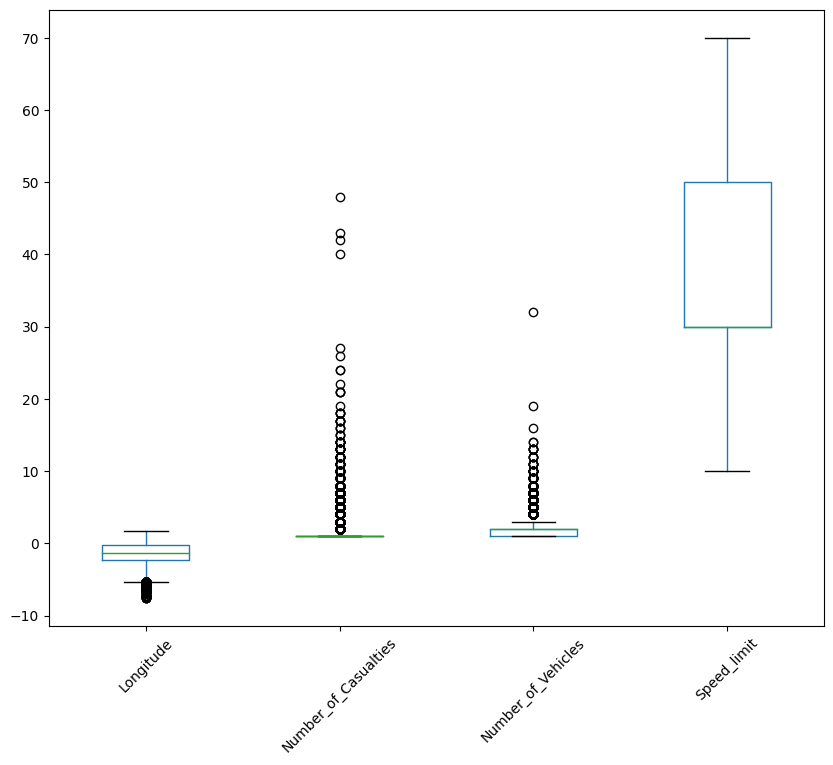

In [113]:
boxplot = df.drop('Latitude', axis=1).boxplot(grid=False, rot=45,  figsize=(10,8))

### Hapus outliers

Melakukan penghapusan baris pada kolom ***Number_of_Vehicles & Number_of_Casualties*** untuk menanganani outliers

In [114]:
Q1 = df['Number_of_Vehicles'].quantile(0.25)
Q3 = df['Number_of_Vehicles'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Number_of_Vehicles'] >= lower_bound) & (df['Number_of_Vehicles'] <= upper_bound)]

In [115]:
Q1 = df['Number_of_Casualties'].quantile(0.25)
Q3 = df['Number_of_Casualties'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Number_of_Casualties'] >= lower_bound) & (df['Number_of_Casualties'] <= upper_bound)]

### Imputasi outliers

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom ***Number_of_Vehicles & Number_of_Casualties***

In [116]:
Q1 = df['Number_of_Vehicles'].quantile(0.25)
Q3 = df['Number_of_Vehicles'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Number_of_Vehicles']=np.where(df['Number_of_Vehicles']>upper_whisker,upper_whisker,np.where(df['Number_of_Vehicles']<lower_whisker,lower_whisker,df['Number_of_Vehicles']))

In [117]:
Q1 = df['Number_of_Casualties'].quantile(0.25)
Q3 = df['Number_of_Casualties'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Number_of_Casualties']=np.where(df['Number_of_Casualties']>upper_whisker,upper_whisker,np.where(df['Number_of_Casualties']<lower_whisker,lower_whisker,df['Number_of_Casualties']))

### Pengecekan ulang

In [119]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Latitude,1.146661
Longitude,0.244328
Number_of_Casualties,0.000000
Number_of_Vehicles,0.000000
Speed_limit,19.383793


1. Latitude: Setelah outliers dihapus dan diimputasi, nilai Latitude yang disajikan adalah 1.146661.

2. Longitude: Nilai Longitude yang disajikan adalah 0.244328 setelah outliers dihapus dan diimputasi.

3. Number_of_Casualties dan Number_of_Vehicles: Setelah outliers dihapus dan diimputasi, kedua kolom ini memiliki nilai 0.000000.

4. Speed_limit: Nilai Speed_limit setelah outliers dihapus dan diimputasi adalah 19.383793. Ini mungkin menjadi hasil dari proses imputasi data atau penghapusan outliers, di mana nilai yang diimputasi mencerminkan distribusi umum dari nilai Speed_limit dalam dataset.

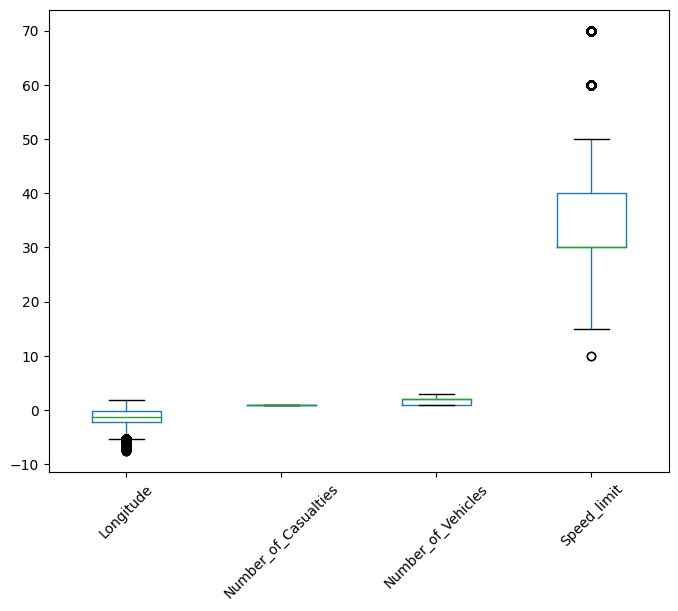

In [123]:
boxplot = df.drop('Latitude', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

# **CONSTRUCT DATA**

## Melakukan Rekayasa Fitur (Feature Engineering) serta pengecekan hasil

In [139]:
# Memecah kolom 'Accident Date' menjadi bagian-bagian
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Day_of_Week'] = df['Accident Date'].dt.dayofweek  # Hari dalam seminggu (0 = Senin, 1 = Selasa, dst.)
df['Month'] = df['Accident Date'].dt.month  # Bulan (1 = Januari, 2 = Februari, dst.)
df['Year'] = df['Accident Date'].dt.year  # Tahun
df['Hour'] = df['Time'].str.split(':', expand=True)[0].astype(int)  # Jam dalam sehari

# Membuat segmen waktu lainnya
df['Daytime'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)

# Menampilkan DataFrame dengan fitur-fitur baru
print(df[['Accident Date', 'Time', 'Day_of_Week', 'Month', 'Year', 'Hour', 'Daytime']])

df.head()

       Accident Date   Time  Day_of_Week  Month  Year  Hour    Daytime
0         2021-01-01  15:11            4      1  2021    15  Afternoon
2         2021-01-04  14:19            0      1  2021    14  Afternoon
3         2021-01-05   8:10            1      1  2021     8    Morning
4         2021-01-06  17:25            2      1  2021    17  Afternoon
6         2021-01-08  13:58            4      1  2021    13  Afternoon
...              ...    ...          ...    ...   ...   ...        ...
307966    2022-01-29  14:01            5      1  2022    14  Afternoon
307969    2022-02-21   3:00            0      2  2022     3      Night
307970    2022-02-23   9:38            2      2  2022     9    Morning
307971    2022-02-23  18:25            2      2  2022    18  Afternoon
307972    2022-02-28  15:45            0      2  2022    15  Afternoon

[232065 rows x 7 columns]


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Month,Year,Hour,Daytime
0,200901BS70001,2021-01-01,4,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,One way street,30,15:11,Urban,Fine no high winds,Car,1,2021,15,Afternoon
2,200901BS70003,2021-01-04,0,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,1,2021,14,Afternoon
3,200901BS70004,2021-01-05,1,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc,1,2021,8,Morning
4,200901BS70005,2021-01-06,2,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,Single carriageway,30,17:25,Urban,Fine no high winds,Car,1,2021,17,Afternoon
6,200901BS70007,2021-01-08,4,Give way or uncontrolled,T or staggered junction,Serious,51.480177,Daylight,Kensington and Chelsea,None,...,Single carriageway,30,13:58,Urban,Fine no high winds,Motorcycle over 500cc,1,2021,13,Afternoon


Hasil di atas adalah untuk melakukan transformasi pada kolom 'Accident Date' dan 'Time' untuk membuat fitur-fitur baru yang dapat berguna dalam analisis selanjutnya. Berikut adalah penjelasan tujuan dari setiap baris syntax:

1. Mengonversi kolom 'Accident Date' menjadi tipe data datetime, sehingga kita dapat dengan mudah mengakses bagian-bagian tanggal seperti hari, bulan, dan tahun.

2. Membuat kolom baru 'Day_of_Week' yang menunjukkan hari dalam seminggu di mana kecelakaan terjadi. Ini dilakukan dengan mengekstraksi indeks hari dalam seminggu dari tanggal kecelakaan yang diwakili oleh kolom 'Accident Date'. Misalnya, 0 menunjukkan Senin, 1 menunjukkan Selasa, dan seterusnya.

3. Membuat kolom baru 'Month' yang menunjukkan bulan di mana kecelakaan terjadi. Ini dilakukan dengan mengekstraksi nomor bulan dari tanggal kecelakaan yang diwakili oleh kolom 'Accident Date'.

4. Membuat kolom baru 'Year' yang menunjukkan tahun di mana kecelakaan terjadi. Ini dilakukan dengan mengekstraksi tahun dari tanggal kecelakaan yang diwakili oleh kolom 'Accident Date'.

5. Membuat kolom baru 'Hour' yang menunjukkan jam dalam sehari ketika kecelakaan terjadi. Ini dilakukan dengan membagi kolom 'Time' berdasarkan titik dua dan mengambil bagian jamnya saja.

6. Membuat kolom baru 'Daytime' yang menunjukkan segmen waktu dalam sehari ketika kecelakaan terjadi, seperti pagi, siang, sore, dan malam, berdasarkan nilai pada kolom 'Hour'.

# **DATA REDUCTION**

## Mengurangi fitur yang kurang relevan serta pengecekan hasil

In [140]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [154]:
df = df.drop(['Accident_Index','Police_Force','Carriageway_Hazards, Urban_or_Rural_Area, Local_Authority_(District), Hour'], axis=1)

In [155]:
df.head()

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Vehicle_Type,Month,Year,Daytime
0,2021-01-01,4,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,-0.201349,1.0,2.0,Dry,One way street,30,15:11,Fine no high winds,Car,1,2021,Afternoon
2,2021-01-04,0,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,-0.179599,1.0,2.0,Dry,Single carriageway,30,14:19,Fine no high winds,Taxi/Private hire car,1,2021,Afternoon
3,2021-01-05,1,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,-0.203110,1.0,2.0,Frost or ice,Single carriageway,30,8:10,Other,Motorcycle over 500cc,1,2021,Morning
4,2021-01-06,2,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,-0.173445,1.0,2.0,Dry,Single carriageway,30,17:25,Fine no high winds,Car,1,2021,Afternoon
6,2021-01-08,4,Give way or uncontrolled,T or staggered junction,Serious,51.480177,Daylight,-0.178561,1.0,2.0,Dry,Single carriageway,30,13:58,Fine no high winds,Motorcycle over 500cc,1,2021,Afternoon


Tujuan dari melakukan proses diatas adalah untuk menghilangkan fitur-fitur yang tidak penting

# **DATA TRANSFORMATION**

## Mapping

In [157]:
accident_severity_map = {'Fatal': 1, 'Serious': 2, 'Slight': 3}
df['Accident_Severity'] = df['Accident_Severity'].map(accident_severity_map)

In [158]:
df

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Vehicle_Type,Month,Year,Daytime
0,2021-01-01,4,Give way or uncontrolled,T or staggered junction,2,51.512273,Daylight,-0.201349,1.0,2.0,Dry,One way street,30,15:11,Fine no high winds,Car,1,2021,Afternoon
2,2021-01-04,0,Give way or uncontrolled,T or staggered junction,3,51.486668,Daylight,-0.179599,1.0,2.0,Dry,Single carriageway,30,14:19,Fine no high winds,Taxi/Private hire car,1,2021,Afternoon
3,2021-01-05,1,Auto traffic signal,T or staggered junction,2,51.507804,Daylight,-0.203110,1.0,2.0,Frost or ice,Single carriageway,30,8:10,Other,Motorcycle over 500cc,1,2021,Morning
4,2021-01-06,2,Auto traffic signal,Crossroads,2,51.482076,Darkness - lights lit,-0.173445,1.0,2.0,Dry,Single carriageway,30,17:25,Fine no high winds,Car,1,2021,Afternoon
6,2021-01-08,4,Give way or uncontrolled,T or staggered junction,2,51.480177,Daylight,-0.178561,1.0,2.0,Dry,Single carriageway,30,13:58,Fine no high winds,Motorcycle over 500cc,1,2021,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307966,2022-01-29,5,Give way or uncontrolled,Slip road,2,57.170725,Daylight,-3.852421,1.0,2.0,Snow,Single carriageway,60,14:01,Fine no high winds,Car,1,2022,Afternoon
307969,2022-02-21,0,Data missing or out of range,Not at junction or within 20 metres,3,57.232273,Darkness - no lighting,-3.809281,1.0,1.0,Frost or ice,Single carriageway,60,3:00,Fine no high winds,Car,2,2022,Night
307970,2022-02-23,2,Give way or uncontrolled,T or staggered junction,3,57.585044,Daylight,-3.862727,1.0,3.0,Frost or ice,Single carriageway,30,9:38,Fine no high winds,Car,2,2022,Morning
307971,2022-02-23,2,Give way or uncontrolled,T or staggered junction,2,57.214898,Darkness - no lighting,-3.823997,1.0,2.0,Wet or damp,Single carriageway,60,18:25,Fine no high winds,Motorcycle over 500cc,2,2022,Afternoon


Tujuan dari mapping adalah untuk mengonversi nilai-nilai dalam dataset ke dalam format yang lebih bermakna atau dapat dipahami lebih baik. Untuk kolom data  yang kita pakai pada mapping kali ini adalah kolom ***Accident_Severity*** yang dinmana untuk tingkat keseriusan kecelakaan  untuk Fatal nomor 1, kemudian Serious nomor 2, dan yang terakhir Slight nomor 3.

## Encoding

Tujuan dari encoding data adalah untuk mengonversi data dari representasi awalnya ke dalam format yang dapat diproses atau dimengerti oleh algoritma pembelajaran mesin atau model statistik.

In [159]:
df = pd.get_dummies(df)

In [160]:
df.head()

,Accident Date,Day_of_Week,Accident_Severity,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Month,Year,...,Vehicle_Type_Motorcycle over 500cc,Vehicle_Type_Other vehicle,Vehicle_Type_Pedal cycle,Vehicle_Type_Ridden horse,Vehicle_Type_Taxi/Private hire car,Vehicle_Type_Van / Goods 3.5 tonnes mgw or under,Daytime_Night,Daytime_Morning,Daytime_Afternoon,Daytime_Evening
0,2021-01-01,4,2,51.512273,-0.201349,1.0,2.0,30,1,2021,...,0,0,0,0,0,0,0,0,1,0
2,2021-01-04,0,3,51.486668,-0.179599,1.0,2.0,30,1,2021,...,0,0,0,0,1,0,0,0,1,0
3,2021-01-05,1,2,51.507804,-0.203110,1.0,2.0,30,1,2021,...,1,0,0,0,0,0,0,1,0,0
4,2021-01-06,2,2,51.482076,-0.173445,1.0,2.0,30,1,2021,...,0,0,0,0,0,0,0,0,1,0
6,2021-01-08,4,2,51.480177,-0.178561,1.0,2.0,30,1,2021,...,1,0,0,0,0,0,0,0,1,0


# **DRIVE FILE Data Cleaned.csv**

https://drive.google.com/file/d/1ulkY8KApNK4VF0TE8gOcdR5R_iFb1Rgl/view?usp=sharing